## **One-sample t-test**

The one-sample t-test is used to check whether a group of data comes from a normal distribution with a specific expected value.


### <ins>Defining the conditions<ins>

First, we import the module and create the dataset. The dataset needs to be in a pandas dataframe, thus pandas needs to be imported as well:

In [1]:
import colibripy.stats.parametric.t_test as tt
import pandas as pd

dataset = [1.4, -0.3, 2.2, 2.7, 2.7, 0.1, 1.1, 3.2, 1.9, 1.3, -0.2, -0.1, 1.0, 1.5, 0.7, 2.1, 2.9, 0.5, 1.0, 2.1]
sample_1 = pd.DataFrame(dataset)

Now we can initiate the evaluation by defining the conditions of the t-test. It is a one-sample t-test, thus we need the `OneSample` module. Here, we perform a **'two-sided'** test at **0.05** significance level, and it is tested whether the expected value of the dataset equals to **1**: 

In [2]:
conditions = tt.OneSample(
    sample_1=sample_1, alpha=0.05, type="two-sided", reference=1
)

The `alpha` only affects the calculated confidence limits, and of course the decision about the nullhypothesis when we compare it to the p-value.

### <ins>Changing the conditions<ins>

We may want to change the conditions, for example to see 90% confidence interval instead of the 95%, or do a one-sided test instead of a two-sided. We can do that without redefining every conditions:

In [3]:
print(conditions.alpha, "and", conditions.type)
conditions.alpha = 0.1
conditions.type = "one-sided"
print(conditions.alpha, "and", conditions.type)

0.05 and two-sided
0.1 and one-sided


### <ins>Performing the test<ins>

#### *Two-sided test*

Let's perform a **'two-sided'** test at **0.05** significance level, and it is tested whether the expected value of the dataset equals to **1**

In [4]:
conditions = tt.OneSample(
    sample_1=sample_1, alpha=0.05, type="two-sided", reference=1
)
results = conditions.test()
results

,mean,ste,test_statistic,95.0% lower CL,95.0% upper CL,p-value
0,1.39,0.239835,1.626115,0.888019,1.891981,0.120397


The `.test()` gives the results of the evaluation in a form of a pandas dataframe. The 'mean' is the mean of `sample_1`, 'ste' is the standard error of the difference between the sample mean and the reference, 'test_statistic' is the calculated test statistic, and the lower and upper confidence limits (CL) gives the interval within which the expected value of the population behind the sample can be found with 1-`alpha` probability (95% in this case).

The p-value is greater than the significance level, thus the nullhypothesis cannot be rejected; the sample can come from a normal distribution with expected value of 1. 

The values in the table can be called using the column names, for example:

In [5]:
results['p-value']


0    0.120397
Name: p-value, dtype: float64

or

In [6]:
results['p-value'].item()

0.12039689250823349

#### *One-sided test*

Let's perform a **'one-sided'** test at **0.1** significance level, and it is tested whether the expected value of the dataset is **greater** or equal to **1**. The greater or equal part is defined in the `.test()`:

In [7]:
conditions = tt.OneSample(
    sample_1=sample_1, alpha=0.1, type="one-sided", reference=1
)
results = conditions.test(">")
results

,mean,ste,test_statistic,90.0% upper CL,p-value
0,1.39,0.239835,1.626115,1.708436,0.939802


The `.test()` gives the results of the evaluation in a form of a pandas dataframe. The 'mean' is the mean of `sample_1`, 'ste' is the standard error of the difference between the sample mean and the reference, 'test_statistic' is the calculated test statistic, and the upper confidence limit (CL) gives the biggest value that if assigned to `reference`, the nullhypothesis is on the verge of acceptance. 

The p-value is greater than the significance level, thus the nullhypothesis cannot be rejected; the sample can come from a normal distribution with expected value of greater than or equal to 1. 

The values in the table can be called using the column names, for example:

In [8]:
results['p-value']


0    0.939802
Name: p-value, dtype: float64

or

In [9]:
results['p-value'].item()

0.9398015537458833

Let's use the upper CL as the `reference` value:

In [10]:
conditions.reference = results["90.0% upper CL"].item()
conditions.test(">")

,mean,ste,test_statistic,90.0% upper CL,p-value
0,1.39,0.239835,-1.327728,1.708436,0.1


As expected, based on the p-value, we are at the verge of accepting the nullhypothesis that the expected value of the sample is greater than or equal to 1.708 at 0.1 significance level.

Let's test if the expected value of the sample is smaller than or equal than 1:

In [11]:
conditions = tt.OneSample(
    sample_1=sample_1, alpha=0.1, type="one-sided", reference=1
)
results = conditions.test("<")
results

,mean,ste,test_statistic,90.0% lower CL,p-value
0,1.39,0.239835,1.626115,1.071564,0.060198


We reject the nullhypothesis at 0.1 significance level, that is, the expected value of the sample is greater than 1. 

Let's use the lower CL as the reference value:

In [12]:
conditions.reference = results["90.0% lower CL"].item()
conditions.test("<")

,mean,ste,test_statistic,90.0% lower CL,p-value
0,1.39,0.239835,1.327728,1.071564,0.1


As expected, based on the p-value, we are at the verge of accepting the nullhypothesis that the expected value of the sample is smaller than or equal to 1.072 at 0.1 significance level.

### <ins>Plotting the data<ins>

The boxplot of the data with a red horizontal line refering to the value of the reference can be plotted as follows:

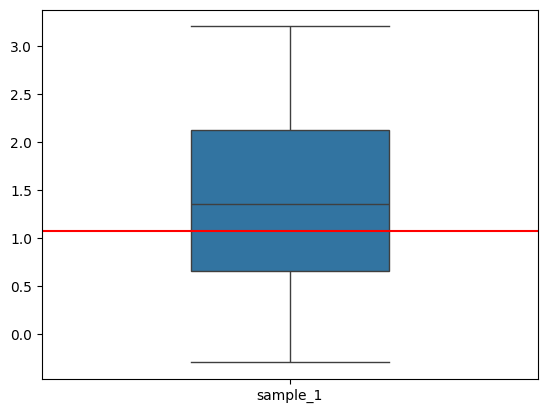

In [13]:
conditions.plot()

### <ins>Residual analysis<ins>

The residuals can only be called, if `.test()` was called already. The residuals, that is the differences between the values and the sample mean can be obtained as:

In [14]:
conditions.residuals

,residuals
0,0.01
1,-1.69
2,0.81
3,1.31
4,1.31
5,-1.29
6,-0.29
7,1.81
8,0.51
9,-0.09


The assumption of the residuals following a normal distribution can be checked by residual plots (QQ plot at the left and histogram of the residuals at right):

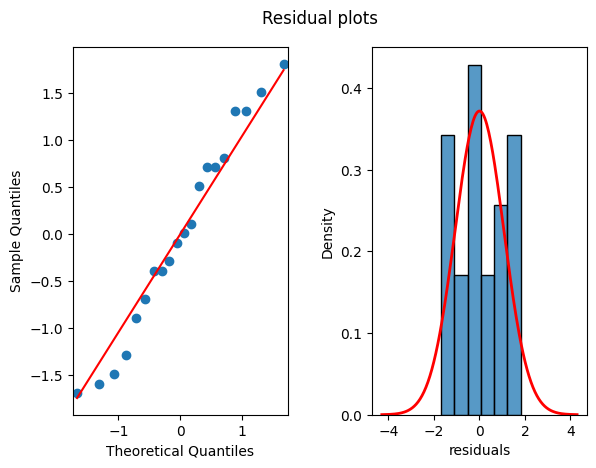

In [15]:
conditions.residual_plot()

Normality test can also be conducted. The following method uses the Shapiro Wilk test:

In [16]:
conditions.normality()

{'p-value': 0.5326040467449369}

or

In [17]:
conditions.normality()["p-value"]

0.5326040467449369

The normality test is automatically performed when `.test()` is called. If the p-value is lower than 0.05, that is we would reject the nullhypothesis of normality at 0.05 significance level, a warning message is generated automatically. For example:

In [18]:
sample_1_nonnormal = pd.DataFrame([1, 1, 10])
conditions_nonnormal = tt.OneSample(
    sample_1=sample_1_nonnormal, alpha=0.05, type="two-sided", reference=1
)
conditions_nonnormal.test()

╒═══════════════════════════════════════════════════════════════════════════════════════════╕
│                                         Warning:                                          │
╞═══════════════════════════════════════════════════════════════════════════════════════════╡
│ The p-value of the Shapiro-Wilk normality test of the residuals is 7.771561172376096e-16. │
│     Normality of the residuals is not fulfilled, nonparametric test may be preferred.     │
╘═══════════════════════════════════════════════════════════════════════════════════════════╛



,mean,ste,test_statistic,95.0% lower CL,95.0% upper CL,p-value
0,4.0,3.0,1.0,-8.907958,16.907958,0.42265
